In [41]:
import numpy as np
import pandas as pd
import pyflux as pf
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt


#convert values to the right format
def convert(dataframe):
    l = []
    for i in dataframe:
        c = str(i).split("..")
        f = ""
        if(c[0][0] == "."):
            f += c[0][1:]
        else:
            f += c[0]
        if(len(c)>1):
            f+="."+c[1][:-1]
        l.append(float(f))
    return l

data = pd.read_csv("/home/nishant/Downloads/merge_oil (1).csv") #importing the dataset
data = data.iloc[::-1]

data.index = pd.to_datetime(data["Date"],format="%Y-%m-%d") #turning the dataframe into a time series
data = data.drop(['Date'],axis=1)

'''
data["IOC_Open"] = convert(data["IOC_Open"])
data["IOC_High"] = convert(data["IOC_High"])
data["IOC_Low"] = convert(data["IOC_Low"])
data["IOC_Close"] = convert(data["IOC_Close"])

data["ONGC_Open"] = convert(data["ONGC_Open"])
data["ONGC_High"] = convert(data["ONGC_High"])
data["ONGC_Low"] = convert(data["ONGC_Low"])
data["ONGC_Close"] = convert(data["ONGC_Close"])

data["TCI_Open"] = convert(data["TCI_Open"])
data["TCI_High"] = convert(data["TCI_High"])
data["TCI_Low"] = convert(data["TCI_Low"])
data["TCI_Close"] = convert(data["TCI_Close"])'''


#splitting the series into training and testing
split = int(0.8 * len(data))
training_data = data[:split]
test_data = data[split:]





In [36]:


#perform adf test on each variable
print("Following ADF Test p value outputs are in the order of Open, High, Low, Close\n")
print("P values of IOC Variables before differencing")
print(adfuller(training_data["IOC_Open"])[1])
print(adfuller(training_data["IOC_High"])[1])
print(adfuller(training_data["IOC_Low"])[1])
print(adfuller(training_data["IOC_Close"])[1])
print("\n")

print("P values of TCI Variables before differencing")
print(adfuller(training_data["TCI_Open"])[1])
print(adfuller(training_data["TCI_High"])[1])
print(adfuller(training_data["TCI_Low"])[1])
print(adfuller(training_data["TCI_Close"])[1])
print("\n")

print("P values of ONGC Variables before differencing")
print(adfuller(training_data["ONGC_Open"])[1])
print(adfuller(training_data["ONGC_High"])[1])
print(adfuller(training_data["ONGC_Low"])[1])
print(adfuller(training_data["ONGC_Close"])[1])
print("\n")

#difference the variables which have p>=0.05 from adf test
diff_ioc_open = training_data["IOC_Open"].diff()[1:]
diff_ioc_high = training_data["IOC_High"].diff()[1:]
diff_ioc_low = training_data["IOC_Low"].diff()[1:]
diff_ioc_close = training_data["IOC_Close"].diff()[1:]

diff_ongc_open = training_data["ONGC_Open"].diff()[1:]
diff_ongc_high = training_data["ONGC_High"].diff()[1:]
diff_ongc_low = training_data["ONGC_Low"].diff()[1:]
diff_ongc_close = training_data["ONGC_Close"].diff()[1:]

diff_tci_open = training_data["TCI_Open"].diff()[1:]
diff_tci_high = training_data["TCI_High"].diff()[1:]
diff_tci_low = training_data["TCI_Low"].diff()[1:]
diff_tci_close = training_data["TCI_Close"].diff()[1:]


#check if the variables differenced are now stationary
print("P values of IOC Variables after differencing")
print(adfuller(diff_ioc_open)[1])
print(adfuller(diff_ioc_high)[1])
print(adfuller(diff_ioc_low)[1])
print(adfuller(diff_ioc_close)[1])
print("\n")
#print(diff_ioc_close.plot())

print("P values of ONGC Variables after differencing")
print(adfuller(diff_ongc_open)[1])
print(adfuller(diff_ongc_high)[1])
print(adfuller(diff_ongc_low)[1])
print(adfuller(diff_ongc_close)[1])
print("\n")
#print(diff_ongc_close.plot())

print("P values of TCI Variables after differencing")
print(adfuller(diff_tci_open)[1])
print(adfuller(diff_tci_high)[1])
print(adfuller(diff_tci_low)[1])
print(adfuller(diff_tci_close)[1])
print("\n")
#print(diff_tci_close.plot()) 








'''
IOC_Open
0.8002719134424383
IOC_High
0.7929649906307306
IOC_Low
0.8029500063118031
IOC_Close
0.8039473147230245
ONGC_Open
0.2742350667014256
ONGC_High
0.2469060046476632
ONGC_Low
0.28255038008874644
ONGC_Close
0.2690677416186882
TCI_Open
0.6197477341099538
TCI_High
0.5681508146555672
TCI_Low
0.6252814709902863
TCI_Close
0.6522010507098521
'''


Following ADF Test p value outputs are in the order of Open, High, Low, Close

P values of IOC Variables before differencing
0.8553530620041412
0.8464031321660082
0.8551711259437099
0.8567977372620562


P values of TCI Variables before differencing
0.6354531503909762
0.5570076699425779
0.5612785922985871
0.6651938853640831


P values of ONGC Variables before differencing
0.4639914449722075
0.4311783921453049
0.4922791966271672
0.4834567780620793


P values of IOC Variables after differencing
0.0
0.0
0.0
0.0


P values of ONGC Variables after differencing
3.7263594045942123e-14
0.0
2.5852804715506738e-14
3.169492435264657e-14


P values of TCI Variables after differencing
3.5116654943737887e-22
0.0
0.0
0.0




'\nIOC_Open\n0.8002719134424383\nIOC_High\n0.7929649906307306\nIOC_Low\n0.8029500063118031\nIOC_Close\n0.8039473147230245\nONGC_Open\n0.2742350667014256\nONGC_High\n0.2469060046476632\nONGC_Low\n0.28255038008874644\nONGC_Close\n0.2690677416186882\nTCI_Open\n0.6197477341099538\nTCI_High\n0.5681508146555672\nTCI_Low\n0.6252814709902863\nTCI_Close\n0.6522010507098521\n'

In [42]:

#create a dataframe consisting of exog variables for arimax

ex_ongc = pd.concat([diff_ongc_open,diff_ongc_high,diff_ongc_low],axis=1)
#print(ex_ongc)
ex_tci = pd.concat([diff_tci_open,diff_tci_high,diff_ioc_low],axis=1)
#print(ex_tci)
ex_ioc = pd.concat([diff_ioc_open,diff_ioc_high,diff_ioc_low],axis=1)
#print(ex_ioc)

/usr/local/lib/python2.7/dist-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

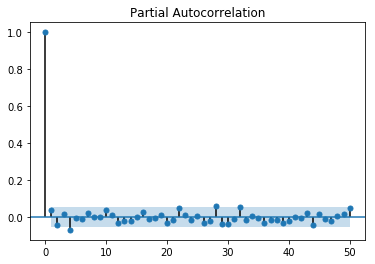

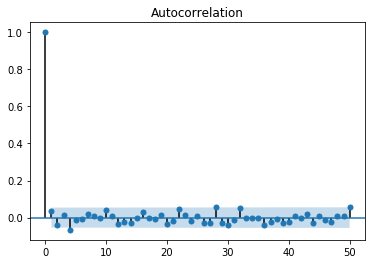

In [55]:
#find p and q for ARMAX for each stock through ACF and PACF

#plot_pacf(diff_ongc_close,lags=50) 
#plot_acf(diff_ongc_close,lags=50) 

#plot_pacf(diff_ioc_close,lags=50) 
#plot_acf(diff_ioc_close,lags=50) 

plot_pacf(diff_tci_close,lags=50) 
plot_acf(diff_tci_close,lags=50) 


#           FORECAST ONGC

'''for i in range(1,6):
    for j in range(1,6):
        try:
            model = ARIMA(diff_ongc_close,order=(i,0,j),exog=ex_ongc)
            model_fit = model.fit(disp=0)
            print(str(i)+" and "+str(j))
            print(model_fit.aic)
            print(model_fit.bic)
            print("\n")
        except:
            print("Invalid p and q") '''
'''
#p = 3 and q = 3 from acf and pacf plot and from the respective AIC and BIC values
model = ARIMA(diff_ongc_close,order=(3,0,3),exog=ex_ongc)
model_fit = model.fit(disp=0)
            
test_exog = pd.concat([test_data["ONGC_Open"],test_data["ONGC_High"],test_data["ONGC_Low"]],axis=1)

forecast = model_fit.forecast(steps=len(test_data),exog=test_exog)[0]
f = []
for yhat in forecast:
    f.append(yhat)


    
    
#print(history)

rms = sqrt(mean_squared_error(list(test_data["ONGC_Close"]), f))
predicted_ongc = pd.DataFrame({'Predicted':f})
predicted_ongc.index = test_data.index

fig = plt.figure()
fig = plt.figure(figsize=(10,5))
ax  = fig.add_subplot(111)
plt.plot(test_data["ONGC_Close"],label='Actual')
plt.plot(predicted_ongc,label='Predicted')
plt.xlabel("Time")
plt.ylabel("ONGC Closing Price")
plt.legend(loc='upper left')
plt.title("ONGC Closing Prices")
#fig.savefig('ONGC1.png')
'''


#           FORECAST IOC
'''
for i in range(1,6):
    for j in range(1,6):
        try:
            model = ARIMA(diff_ongc_close,order=(i,0,j),exog=ex_ongc)
            model_fit = model.fit(disp=0)
            print(str(i)+" and "+str(j))
            print(model_fit.aic)
            print(model_fit.bic)
            print("\n")
        except:
            print("Invalid p and q")'''

'''

model = ARIMA(diff_ioc_close,order=(3,0,3),exog=ex_ioc)
model_fit = model.fit(disp=0)

test_exog = pd.concat([test_data["IOC_Open"],test_data["IOC_High"],test_data["IOC_Low"]],axis=1)

forecast = model_fit.forecast(steps=len(test_data),exog=test_exog)[0]
f = []
for yhat in forecast:
    f.append(yhat)


    
    

rms = sqrt(mean_squared_error(list(test_data["IOC_Close"]), f))
predicted_ioc = pd.DataFrame({'Predicted':f})
predicted_ioc.index = test_data.index
print(rms)
#print(predicted_ioc)

fig = plt.figure()
fig = plt.figure(figsize=(10,5))
ax  = fig.add_subplot(111)
plt.plot(test_data["IOC_Close"],label='Actual')
plt.plot(predicted_ioc,label='Predicted')
plt.xlabel("Time")
plt.ylabel("IOC Closing Price")
plt.legend(loc='upper left')
plt.title("IOC Closing Prices")
fig.savefig('IOC1.png')
'''

#           FORECAST TCI

'''for i in range(1,6):
    for j in range(1,6):
        try:
            model = ARIMA(diff_tci_close,order=(i,0,j),exog=ex_tci)
            model_fit = model.fit(disp=0)
            print(str(i)+" and "+str(j))
            print(model_fit.aic)
            print(model_fit.bic)
            print("\n")
        except:
            print("Invalid p and q") '''
'''
model = ARIMA(diff_tci_close,order=(4,0,4),exog=ex_tci)
model_fit = model.fit(disp=0,transparams=False)

test_exog = pd.concat([test_data["TCI_Open"],test_data["TCI_High"],test_data["TCI_Low"]],axis=1)

forecast = model_fit.forecast(steps=len(test_data),exog=test_exog)[0]

f = []
for yhat in forecast:
    f.append(yhat)

rms = sqrt(mean_squared_error(list(test_data["TCI_Close"]), f))
predicted_tci = pd.DataFrame({'Predicted':f})
predicted_tci.index = test_data.index

fig = plt.figure()
fig = plt.figure(figsize=(10,5))
ax  = fig.add_subplot(111)
plt.plot(test_data["TCI_Close"],label='Actual')
plt.plot(predicted_tci,label='Predicted')
plt.xlabel("Time")
plt.ylabel("TCI Closing Price")
plt.legend(loc='upper left')
plt.title("TCI Closing Prices")
fig.savefig('TCI1.png')
'''







